<a href="https://colab.research.google.com/github/nishee0521/Deep-Learning/blob/master/RNNs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive 
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [0]:
#changing directory
%cd gdrive/My\ Drive/DeepLearning/Deep_Learning_A_Z


/content/gdrive/My Drive/DeepLearning/Deep_Learning_A_Z


In [0]:
%cd ../Volume 1 - Supervised Deep Learning

/content/gdrive/My Drive/DeepLearning/Deep_Learning_A_Z/Volume 1 - Supervised Deep Learning


In [0]:
%cd Part 3 - Recurrent Neural Networks (RNN)

/content/gdrive/My Drive/DeepLearning/Deep_Learning_A_Z/Volume 1 - Supervised Deep Learning/Part 3 - Recurrent Neural Networks (RNN)


In [0]:
!ls

 Recurrent_Neural_Networks
 RNNs.ipynb
'Section 11 - RNN Intuition'
'Section 12 - Building a RNN'
'Section 13 - Evaluating, Improving and Tuning the RNN'


In [0]:
train_df = pd.read_csv('Recurrent_Neural_Networks/Google_Stock_Price_Train.csv')

In [0]:
#we shall be predicting the opening prices of stocks
train_data = train_df.iloc[:, 1:2].values

In [0]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
train_data = sc.fit_transform(train_data)

In [0]:
#create a data-structure such that Xtrin consist of stock prices of 60 preceeding days and y_train consist of stock prices of the day
X_train = [train_data[i-60:i, 0] for i in range(60, 1258)]
y_train = [train_data[i, 0] for i in range(60,1258)]

In [0]:
#creating the np array
X_train,y_train = np.array(X_train), np.array(y_train)

In [0]:
print(X_train.shape)

(1198, 60)


In [0]:
print(y_train.shape)

(1198,)


In [0]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

##Building the RNN

In [0]:
#importing packages
from keras.models import Sequential
from keras.layers import Dense 
from keras.layers import LSTM
from keras.layers import Dropout


#initialize the regressor
regressor = Sequential()


In [0]:
#adding the LSTM layer
regressor.add(LSTM(units=60, return_sequences=True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(rate=0.1))

In [0]:
#adding 3 more LTSM layers

regressor.add(LSTM(units = 60, return_sequences=True))
regressor.add(Dropout(rate=0.1))

regressor.add(LSTM(units=60, return_sequences=True))
regressor.add(Dropout(rate=0.1))

regressor.add(LSTM(units = 60))
regressor.add(Dropout(rate=0.1))

In [0]:
regressor.add(Dense(units = 1))

In [0]:
regressor.compile(optimizer='adam', loss='mean_squared_error')

In [0]:
regressor.fit(X_train, y_train, epochs = 100, batch_size=32)

Epoch 1/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0039
Epoch 2/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0034
Epoch 3/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0033
Epoch 4/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0032
Epoch 5/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0033
Epoch 6/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0030
Epoch 7/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0031
Epoch 8/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0032
Epoch 9/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0029
Epoch 10/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0030
Epoch 11/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0028
Epoch 12/100
1198/1198 [==============================] - 6s 5ms/step - lo

In [0]:
#making test dataframe
test_df = pd.read_csv('Recurrent_Neural_Networks/Google_Stock_Price_Test.csv')

In [0]:
test_data = test_df.iloc[:,1:2]

In [0]:
test_data = sc.fit(test_data)

In [0]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    20 non-null     object 
 1   Open    20 non-null     float64
 2   High    20 non-null     float64
 3   Low     20 non-null     float64
 4   Close   20 non-null     float64
 5   Volume  20 non-null     object 
dtypes: float64(4), object(2)
memory usage: 1.1+ KB


In [0]:
df = pd.concat((train_df, test_df), axis=0)

In [0]:
data = df.iloc[:, 1:2].values

In [0]:
data = sc.transform(data)

In [0]:
X_test = [data[i-60:i,0] for i in range(1258, 1278)]
y_test = [data[i,0] for i in range(1258,1278)]

In [0]:
X_test, y_test = np.array(X_test), np.array(y_test)

In [0]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [0]:
predicted_price = regressor.predict(X_test)

In [0]:
actual_predictions = sc.inverse_transform(predicted_price)
actual_price = test_df.iloc[:, 1:2].values

In [0]:
actual_price = actual_price.reshape(-1,1)

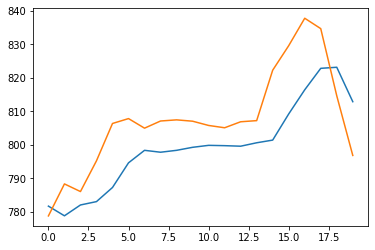

In [0]:
plt.plot(actual_predictions)
plt.plot(actual_price)

In [0]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(actual_predictions, actual_price))

150.72445509877966


In [0]:
from sklearn.metrics import average_precision_score
print(average_precision_score(actual_predictions,actual_price))

ValueError: ignored